In [416]:
import re
import os
import time
import random
import requests
import numpy as np
import pandas as pd
from os import system
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from imblearn.over_sampling import SMOTE

import time
from selenium.webdriver.chrome.options import Options

In [26]:
driver = webdriver.Chrome()
driver.get('https://www.hotels.com/search.do?resolved-location=CITY%3A1506246%3AUNKNOWN%3AUNKNOWN&f-bed-quantity=1&destination-id=1506246&q-destination=New%20York,%20New%20York,%20United%20States%20Of%20America&q-check-in=2019-10-30&q-check-out=2019-10-31&q-rooms=1&q-room-0-adults=2&q-room-0-children=0')


In [27]:
def get_hotel_urls(lst):
    #get all urls of hotels in New York area from hotels.com 
    hotel_list = driver.find_elements_by_xpath('//div[@class="description resp-module"]/figure[@class="image"]/a')
    for i in hotel_list:
        lst.append(i.get_attribute('href'))
    

In [40]:
hotel_all_links = []

In [41]:
get_hotel_urls(hotel_all_links)

In [48]:
hotel_all_links

['https://www.hotels.com/travelads/trackredirect.html?trackingUrl=H4sIAAAAAAAAAD2R2Y6jSBRE_6Ze6C4g2UsqjTCbMWCz2_AywpDs-5IGf_3U9EjzEqEToStdKcp1HZcvHF_nBME2yZbPZsiy6jMdOtz_k4nZ4sEZVSnEEY2fhxW2y_-V1FZp89fPcdpUfSEna_ItdeNvwyxAtTZ8mzOIwNYEDJNoj9g0dr5mvKVSCFTapq5LZPOMWuvOhb3sSO2QLPuiacvnwMpzLuGvfRuw7C7lJmM5vnbtjACBNMGWZ8QevaJCJcoOkBz6TRoM3Lb308OKbG7DWOQYzw1IV3imlEhyyvBMkeP0kBnzfVKnh5J6xPmJbotrwddbtO9CrD1cCBwdEzRDwm46NI2TlUMtJ4V3VSnjWKo5XtS1HcGjxmKPvpcUtIJd7_3QCji59XraTift0GtjK6RTxL_UK6IJJFIBTsaCedlFHYJQuDYFRDxkfTlXp1xx5nNcu36ZBevrzK2X2YhDGj13RY95bweLjUxrIdKmL8gn2rjC80866mIAAgrapN5Zk892GTvbCVe7WCMq2chxSwXE9ORzUmYlbn-pr2IE9ksyoyd_v98dr8LYu3oN0jzMLt6liiYGCiYWzkoES_pirf7FckqrG4x8ypIbq5U1HTS-dLRuYco55dyfxbNur5S_jTnMRPdmZpBjZ2mEckm2jhyI0XYEBblWa3DonpUdG9uq5HnQ-0c_eydlJMoe6zvlbYVyecTinYEtjs_Ubqvm-aDZMZhDwGNlICS93Eyli3WP_BZlxTxNRH-oO2GkjBHJ05IsPfkc8kc_Es-TrC1R5JnJfMF6HJD2u9XnGx0pMc-KBG7vrawLMf_KQZLnTOoFzKpdkzlXfwa8AQogLqdZWGIWzuR89D55fF9wlRMaAWAy7VUmp_xhF9XO4fFLHo2IICIB-pqnxY5kpr5yU-1XMkSzG_WFwgQlxz

In [96]:

def get_hotels_data(lst):
    counter = 0
    for url in hotel_all_links[700:]:

        hotel_dict = {}
        try:
            time.sleep(1)
            driver.get(url)

            hotel_title = driver.find_element_by_xpath('//*[@id="property-header"]/div/div[1]/h1').text
            hotel_dict['hotel_title'] = hotel_title

            hotel_price = driver.find_element_by_xpath('//*[@id="book-info-container"]/div[1]').text.split('\n')
            for i in hotel_price:
                if '$' in i:
                    hotel_dict['hotel_price'] = i[-3:]

            hotel_star =  driver.find_element_by_xpath('//*[@id="property-header"]/div/div[1]/span[2]').text
            hotel_dict['hotel_star'] = hotel_star


            hotel_room = driver.find_element_by_xpath('//*[@id="at-a-glance"]/div/div/div[1]/div/ul[1]/li[1]').text.split(' ')[-2]
            hotel_dict['hotel_room'] = hotel_room

            hotel_restaurant = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            rest = False
            for i in hotel_restaurant:
                if ('restaurants' in i) or ('restaurant' in i) or ('Restaurant' in i):
                    rest = True
                if rest == True:
                    hotel_dict['hotel_restaurant'] = 'Yes'
                else:
                    hotel_dict['hotel_restaurant'] = 'No'

            hotel_bar = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            bar = False
            for i in hotel_bar:
                if (i == 'Bar/lounge') or ('bar/lounge' in i) or ('bars/lounges' in i):
                    bar = True
                if bar == True:
                    hotel_dict['hotel_bar'] = 'Yes'
                else:
                    hotel_dict['hotel_bar'] = 'No'

            hotel_fitness = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            fitness = False
            for i in hotel_fitness:
                if ('fitness' in i) or ('Fitness' in i) or ('health' in i) or ('Health' in i):
                    fitness = True
                if fitness == True:
                    hotel_dict['hotel_fitness'] = 'Yes'
                else:
                    hotel_dict['hotel_fitness'] = 'No'

            hotel_spa = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            spa = False
            for i in hotel_spa:
                if (i == 'spa') or ('Spa' in i):
                    spa = True
                if spa == True:
                    hotel_dict['hotel_spa'] = 'Yes'
                else:
                    hotel_dict['hotel_spa'] = 'No'

            hotel_pool = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            pool = False
            for i in hotel_pool:
                if ('pool' in i) or ('Pool' in i):
                    pool = True
                if pool == True:
                    hotel_dict['hotel_pool'] = 'Yes'
                else:
                    hotel_dict['hotel_pool'] = 'No'

            hotel_valet = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            valet = False
            for i in hotel_valet:
                if ('Valet' in i) or ('valet' in i):
                    valet = True
                if valet == True:
                    hotel_dict['valet_parking'] = 'Yes'
                else:
                    hotel_dict['valet_parking'] = 'No'

            hotel_limo = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            limo = False
            for i in hotel_limo:
                if ('Limo' in i) or ('limo' in i):
                    limo = True
                if limo == True:
                    hotel_dict['hotel_limo'] = 'Yes'
                else:
                    hotel_dict['hotel_limo'] = 'No'

            hotel_rooftop = driver.find_element_by_xpath('//*[@id="overview-section-4"]').text.split('\n')
            rooftop = False
            for i in hotel_rooftop:
                if ('rooftop' in i) or ('Rooftop' in i) or ('Terrace' in i):
                    rooftop = True
                if rooftop == True:
                    hotel_dict['hotel_rooftop'] = 'Yes'
                else:
                    hotel_dict['hotel_rooftop'] = 'No'


            lst.append(hotel_dict)

        except:
            hotel_dict['hotel_title'] = ''
            hotel_dict['hotel_price'] = ''
            hotel_dict['hotel_star'] = ''
            hotel_dict['hotel_room'] = ''
            hotel_dict['hotel_restaurant'] = ''
            hotel_dict['hotel_bar'] = ''
            hotel_dict['hotel_fitness'] = ''
            hotel_dict['hotel_spa'] = ''
            hotel_dict['hotel_pool'] = ''
            hotel_dict['valet_parking'] = ''
            hotel_dict['hotel_limo'] = ''
            hotel_dict['hotel_rooftop'] = ''


            lst.append(hotel_dict)
        counter += 1
        print(counter)




In [66]:
#hotel_list = []

In [97]:
get_hotels_data(hotel_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222


In [102]:
hotel_list

[{'hotel_title': 'Crowne Plaza Times Square Manhattan, New York',
  'hotel_price': '229',
  'hotel_star': '4-star',
  'hotel_room': '795',
  'hotel_restaurant': 'Yes',
  'hotel_bar': 'Yes',
  'hotel_fitness': 'Yes',
  'hotel_spa': 'No',
  'hotel_pool': 'Yes',
  'valet_parking': 'Yes',
  'hotel_limo': 'No',
  'hotel_rooftop': 'No'},
 {'hotel_title': 'PUBLIC, an Ian Schrager hotel, New York',
  'hotel_price': '345',
  'hotel_star': '4-star',
  'hotel_room': '367',
  'hotel_restaurant': 'Yes',
  'hotel_bar': 'Yes',
  'hotel_fitness': 'Yes',
  'hotel_spa': 'No',
  'hotel_pool': 'No',
  'valet_parking': 'No',
  'hotel_limo': 'No',
  'hotel_rooftop': 'Yes'},
 {'hotel_title': 'Meadowlands River Inn, Secaucus',
  'hotel_price': '107',
  'hotel_star': '2.5-star',
  'hotel_room': '149',
  'hotel_restaurant': 'No',
  'hotel_bar': 'No',
  'hotel_fitness': 'Yes',
  'hotel_spa': 'No',
  'hotel_pool': 'No',
  'valet_parking': 'No',
  'hotel_limo': 'No',
  'hotel_rooftop': 'No'},
 {'hotel_title': 'Hil

# SQL

In [6]:
import sqlite3
import mysql.connector
import config
from mysql.connector import errorcode
from datetime import date, datetime, timedelta

In [7]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
)
cursor = cnx.cursor(buffered=True)

In [8]:
db_name = 'hotels'

In [112]:
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name
    else:
        print(err)
        exit(1)

Database hotels does not exists.
Database hotels created successfully.


In [113]:
create_hotels = """
CREATE TABLE hotels (
hotel_title TEXT,
hotel_price TEXT,
hotel_star TEXT,
hotel_room TEXT,
hotel_restaurant TEXT,
hotel_bar TEXT,
hotel_fitness TEXT,
hotel_spa TEXT,
hotel_pool TEXT,
valet_parking TEXT,
hotel_limo TEXT,
hotel_rooftop TEXT
);
"""

In [114]:
cursor.execute(create_hotels)
cnx.commit()

In [123]:
def create_hotel_tuple(lst):
    tuple_list = []
    for i in lst:
        new_tuple = (i['hotel_title'],i['hotel_price'], i['hotel_star'], i['hotel_room'], i['hotel_restaurant'],i['hotel_bar'],i['hotel_fitness'],i['hotel_spa'],i['hotel_pool'],i['valet_parking'],i['hotel_limo'],i['hotel_rooftop'])
        tuple_list.append(new_tuple)
    return tuple_list

In [126]:
hotel_tuples = create_hotel_tuple(hotel_list)

In [125]:
def insert_into_hotels(tuple_list):
    insert_hotels = """INSERT INTO hotels(hotel_title, hotel_price, hotel_star, hotel_room, hotel_restaurant, hotel_bar, hotel_fitness, hotel_spa, hotel_pool, valet_parking, hotel_limo, hotel_rooftop)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
    cursor.executemany(insert_hotels,tuple_list)
    cnx.commit()

In [127]:
insert_into_hotels(hotel_tuples)

In [9]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = 'hotels'
)
cursor = cnx.cursor(buffered=True)

In [64]:
q = """SELECT * FROM hotels;"""
cursor.execute(q)
df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]

In [65]:
df

,hotel_title,hotel_price,hotel_star,hotel_room,hotel_restaurant,hotel_bar,hotel_fitness,hotel_spa,hotel_pool,valet_parking,hotel_limo,hotel_rooftop
0,"Crowne Plaza Times Square Manhattan, New York",229,4-star,795,Yes,Yes,Yes,No,Yes,Yes,No,No
1,"PUBLIC, an Ian Schrager hotel, New York",345,4-star,367,Yes,Yes,Yes,No,No,No,No,Yes
2,"Meadowlands River Inn, Secaucus",107,2.5-star,149,No,No,Yes,No,No,No,No,No
3,"Hilton Garden Inn Times Square, New York",140,3.5-star,369,No,No,Yes,No,No,No,No,No
4,"Hampton Inn Times Square North, New York",119,3-star,300,No,No,Yes,No,No,Yes,No,No
5,"Aliz Hotel Times Square, New York",134,4-star,287,Yes,Yes,Yes,No,No,Yes,No,Yes
6,"EVEN Hotel New York- Midtown East, New York",199,4-star,230,Yes,Yes,Yes,No,No,No,No,Yes
7,Holiday Inn - Long Island City - Manhattan Vie...,159,3-star,136,Yes,Yes,Yes,No,No,No,No,No
8,"The Westin New York Grand Central, New York",173,4.5-star,774,Yes,Yes,Yes,No,No,Yes,No,No
9,Hilton Garden Inn New York/Manhattan-Midtown E...,129,3.5-star,206,Yes,Yes,Yes,No,No,Yes,No,Yes


In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.drop([241],axis=0,inplace=True)

In [68]:
df.hotel_price.unique()

array(['229', '345', '107', '140', '119', '134', '199', '159', '173',
       '129', '104', '115', '135', '160', '111', '184', '$75', '179',
       '165', '132', '143', '149', '139', '169', '109', '152', '154',
       '206', '144', '$79', '175', '200', '153', '202', '212', '189',
       '131', '164', '239', '222', '120', '170', '145', '118', '269',
       '155', '204', '185', '223', '$99', '259', '219', '209', '150',
       '188', '180', '249', '198', '122', '237', '255', '114', '295',
       '183', '112', '245', '191', '225', '194', '176', '168', '315',
       '329', '228', '215', '195', '247', '210', '319', '105', '203',
       '288', '300', '172', '350', '275', '$87', '227', '158', '299',
       '240', '161', '260', '230', '309', '305', '279', '335', '151',
       '365', '324', '310', '289', '271', '$84', '314', '214', '359',
       '121', '325', '440', '341', '290', '326', '197', '273', '284',
       '232', '138', '241', '425', '380', '277', '445', '117', '338',
       '374', '459',

In [69]:
df.hotel_price = df.hotel_price.apply(lambda x: int(x.replace('$','')))

In [70]:
df.hotel_star = df.hotel_star.apply(lambda x: float(x.replace('-star','')))

In [71]:
df.hotel_room = df.hotel_room.apply(lambda x: int(x.replace(',','')))

In [72]:
df

,hotel_title,hotel_price,hotel_star,hotel_room,hotel_restaurant,hotel_bar,hotel_fitness,hotel_spa,hotel_pool,valet_parking,hotel_limo,hotel_rooftop
0,"Crowne Plaza Times Square Manhattan, New York",229,4.0,795,Yes,Yes,Yes,No,Yes,Yes,No,No
1,"PUBLIC, an Ian Schrager hotel, New York",345,4.0,367,Yes,Yes,Yes,No,No,No,No,Yes
2,"Meadowlands River Inn, Secaucus",107,2.5,149,No,No,Yes,No,No,No,No,No
3,"Hilton Garden Inn Times Square, New York",140,3.5,369,No,No,Yes,No,No,No,No,No
4,"Hampton Inn Times Square North, New York",119,3.0,300,No,No,Yes,No,No,Yes,No,No
5,"Aliz Hotel Times Square, New York",134,4.0,287,Yes,Yes,Yes,No,No,Yes,No,Yes
6,"EVEN Hotel New York- Midtown East, New York",199,4.0,230,Yes,Yes,Yes,No,No,No,No,Yes
7,Holiday Inn - Long Island City - Manhattan Vie...,159,3.0,136,Yes,Yes,Yes,No,No,No,No,No
8,"The Westin New York Grand Central, New York",173,4.5,774,Yes,Yes,Yes,No,No,Yes,No,No
9,Hilton Garden Inn New York/Manhattan-Midtown E...,129,3.5,206,Yes,Yes,Yes,No,No,Yes,No,Yes


# EDA


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

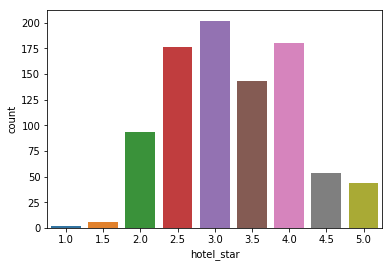

In [74]:
sns.countplot(df.hotel_star)

In [75]:
df['hotel_tier'] = df.hotel_star.apply(lambda x: 'Economy' if x <= 2.5 else('Midscale' if 2.5 < x <= 3.5 else ('Luxury')))


In [76]:
categorical_cols = df.drop(['hotel_title', 'hotel_star','hotel_price','hotel_room','hotel_tier'],axis=1)


In [77]:
for i in list(categorical_cols.columns):
    df[i] = df[i].apply(lambda x: 1 if x == "Yes" else 0)

In [458]:
df.head()

,hotel_title,hotel_price,hotel_star,hotel_room,hotel_restaurant,hotel_bar,hotel_fitness,hotel_spa,hotel_pool,valet_parking,hotel_limo,hotel_rooftop,hotel_tier
0,"Crowne Plaza Times Square Manhattan, New York",229,4.0,795,1,1,1,0,1,1,0,0,Luxury
1,"PUBLIC, an Ian Schrager hotel, New York",345,4.0,367,1,1,1,0,0,0,0,1,Luxury
2,"Meadowlands River Inn, Secaucus",107,2.5,149,0,0,1,0,0,0,0,0,Economy
3,"Hilton Garden Inn Times Square, New York",140,3.5,369,0,0,1,0,0,0,0,0,Midscale
4,"Hampton Inn Times Square North, New York",119,3.0,300,0,0,1,0,0,1,0,0,Midscale


In [463]:
df

,hotel_title,hotel_price,hotel_star,hotel_room,hotel_restaurant,hotel_bar,hotel_fitness,hotel_spa,hotel_pool,valet_parking,hotel_limo,hotel_rooftop,hotel_tier
0,"Crowne Plaza Times Square Manhattan, New York",229,4.0,795,1,1,1,0,1,1,0,0,Luxury
1,"PUBLIC, an Ian Schrager hotel, New York",345,4.0,367,1,1,1,0,0,0,0,1,Luxury
2,"Meadowlands River Inn, Secaucus",107,2.5,149,0,0,1,0,0,0,0,0,Economy
3,"Hilton Garden Inn Times Square, New York",140,3.5,369,0,0,1,0,0,0,0,0,Midscale
4,"Hampton Inn Times Square North, New York",119,3.0,300,0,0,1,0,0,1,0,0,Midscale
5,"Aliz Hotel Times Square, New York",134,4.0,287,1,1,1,0,0,1,0,1,Luxury
6,"EVEN Hotel New York- Midtown East, New York",199,4.0,230,1,1,1,0,0,0,0,1,Luxury
7,Holiday Inn - Long Island City - Manhattan Vie...,159,3.0,136,1,1,1,0,0,0,0,0,Midscale
8,"The Westin New York Grand Central, New York",173,4.5,774,1,1,1,0,0,1,0,0,Luxury
9,Hilton Garden Inn New York/Manhattan-Midtown E...,129,3.5,206,1,1,1,0,0,1,0,1,Midscale


In [465]:
df.corr()

,hotel_price,hotel_star,hotel_room,hotel_restaurant,hotel_bar,hotel_fitness,hotel_spa,hotel_pool,valet_parking,hotel_limo,hotel_rooftop
hotel_price,1.000000,0.627168,0.141020,0.328353,0.345874,0.240655,0.173356,0.067173,0.437677,0.184496,0.178625
hotel_star,0.627168,1.000000,0.368916,0.601961,0.617515,0.380426,0.101563,0.067377,0.569221,0.217304,0.312591
hotel_room,0.141020,0.368916,1.000000,0.360251,0.358893,0.331332,0.097669,0.037989,0.356833,0.086097,0.070716
hotel_restaurant,0.328353,0.601961,0.360251,1.000000,0.799384,0.365210,0.092809,0.154306,0.358771,0.119925,0.226543
hotel_bar,0.345874,0.617515,0.358893,0.799384,1.000000,0.396885,0.090530,0.167645,0.371424,0.129732,0.275154
hotel_fitness,0.240655,0.380426,0.331332,0.365210,0.396885,1.000000,0.054240,0.298191,0.320040,0.108378,0.122110
hotel_spa,0.173356,0.101563,0.097669,0.092809,0.090530,0.054240,1.000000,0.015672,0.073927,0.050570,-0.009215
hotel_pool,0.067173,0.067377,0.037989,0.154306,0.167645,0.298191,0.015672,1.000000,-0.104307,-0.002042,0.101990
valet_parking,0.437677,0.569221,0.356833,0.358771,0.371424,0.320040,0.073927,-0.104307,1.000000,0.213734,0.181466
hotel_limo,0.184496,0.217304,0.086097,0.119925,0.129732,0.108378,0.050570,-0.002042,0.213734,1.000000,0.070574


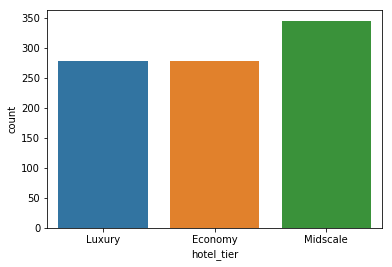

In [79]:
sns.countplot(df.hotel_tier)

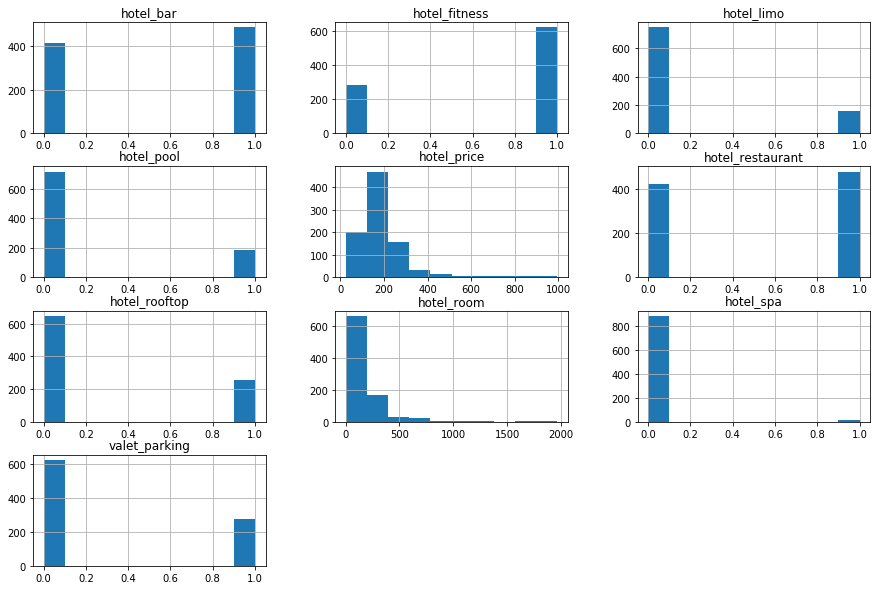

In [441]:
df.drop(['hotel_star'],axis=1).hist(figsize=(15,10));

# Classification


In [418]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix, classification_report
from sklearn.preprocessing import normalize, scale, StandardScaler, Normalizer
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Classification Algorithms
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

In [29]:
#features without price
features = ['hotel_room','hotel_restaurant','hotel_bar','hotel_fitness','hotel_spa','hotel_pool','valet_parking','hotel_limo','hotel_rooftop']

In [81]:
X = df[features]
y = df.hotel_tier

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [239]:
#features with price
features_w_price = ['hotel_price','hotel_room','hotel_restaurant','hotel_bar','hotel_fitness','hotel_spa','hotel_pool','valet_parking','hotel_limo','hotel_rooftop']

In [242]:
X_p = df[features_w_price]
y_p = df.hotel_tier

In [243]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size=0.25)
X_p_train_scaled = scale.fit_transform(X_p_train)
X_p_test_scaled = scale.fit_transform(X_p_test)

In [373]:
def cross_val(models,X_train,y_train):
    for model in models:
        model.fit(X_train,y_train)
        
        print(str(model).split('(')[0],'Cross Validation:')
        print(f"-- Accuracy: {cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy').mean():.2%}")

In [359]:
clf = [RandomForestClassifier(),AdaBoostClassifier(),
      DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB(),SVC(),OneVsRestClassifier(SVC())]


In [374]:
#base models on data with price feature
cross_val(clf,X_p_train_scaled,y_p_train);

RandomForestClassifier Cross Validation:
-- Accuracy: 72.89%
AdaBoostClassifier Cross Validation:
-- Accuracy: 70.80%
DecisionTreeClassifier Cross Validation:
-- Accuracy: 66.97%
KNeighborsClassifier Cross Validation:
-- Accuracy: 67.26%
BernoulliNB Cross Validation:
-- Accuracy: 70.50%
SVC Cross Validation:
-- Accuracy: 69.77%
OneVsRestClassifier Cross Validation:
-- Accuracy: 69.62%


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [444]:
#baseline models
cross_val(clf,X_train_scaled,y_train);

RandomForestClassifier Cross Validation:
-- Accuracy: 57.48%
AdaBoostClassifier Cross Validation:
-- Accuracy: 67.99%
DecisionTreeClassifier Cross Validation:
-- Accuracy: 57.94%
KNeighborsClassifier Cross Validation:
-- Accuracy: 65.77%
BernoulliNB Cross Validation:
-- Accuracy: 66.36%
SVC Cross Validation:
-- Accuracy: 67.85%
OneVsRestClassifier Cross Validation:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

-- Accuracy: 67.84%


#### Base on Accuracy of the models after cross validation, Ada Boost Classifer, Bernoulli Naive Bayes and Support Vector Classification are selected. Even though low on Accuracy score, I also want to test Random Forest with different parameters.

In [ ]:
clf_CV = [RandomForestClassifier(),AdaBoostClassifier(), BernoulliNB(), SVC()]

# Tunning Models

### Random Forest

In [161]:
def gs_rf(X_train,y_train):

    param =  [{'criterion': ['gini', 'entropy'],'max_depth': [5,10,15], 
                     'n_estimators' : [10,50,100] }]
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param, verbose = 3, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    output =  [grid_search.best_score_,grid_search.best_params_]
    
        
    return output

In [445]:
#without price
gs_rf(X_train_scaled,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    5.0s finished


[0.6962962962962963, {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}]

In [262]:
#with price
gs_rf(X_p_train_scaled,y_p_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.8s finished


[0.7140740740740741,
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}]

### AdaBoosting Classifier

In [448]:
def gs_abc(X_train,y_train):
    param = [{'learning_rate': [0.1,0.3,0.5,0.8,1],'n_estimators': [50,100,200,300]}]
    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid = param, verbose = 1, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    param = [f'{grid_search.best_score_:.2%}', grid_search.best_params_ ]
    return  param

In [449]:
#without price
gs_abc(X_train_scaled,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


['67.85%', {'learning_rate': 0.5, 'n_estimators': 100}]

In [263]:
#with price
gs_abc(X_p_train_scaled, y_p_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['74.07%', {'learning_rate': 0.3, 'n_estimators': 50}]

### Bernoulli Naive Bayes

In [185]:
def gs_bnb(X_train,y_train):
    param = [{'alpha': [0.1,0.2,0.3,0.5,0.8,1]}]
    grid_search = GridSearchCV(BernoulliNB(), param_grid = param, verbose = 1, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    param = [f'{grid_search.best_score_:.2%}', grid_search.best_params_ ]
    return  param

In [186]:
#without price
gs_bnb(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished


['66.52%', {'alpha': 0.1}]

In [264]:
#with price
gs_bnb(X_p_train_scaled, y_p_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.7s finished


['70.67%', {'alpha': 0.1}]

### Suport Vector Classification

In [364]:
def gs_SVC(X_train,y_train):
    param = [{'kernel':('linear', 'rbf','poly'), 'C':[1,5,10]}]
    grid_search = GridSearchCV(SVC(), param_grid = param, verbose = 1, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    param = [f'{grid_search.best_score_:.2%}', grid_search.best_params_ ]
    return  param

In [365]:
gs_SVC(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.5s finished


['68.15%', {'C': 1, 'kernel': 'rbf'}]

In [366]:
gs_SVC(X_p_train_scaled, y_p_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.7s finished


['71.41%', {'C': 5, 'kernel': 'linear'}]

# Apply models to test data

In [330]:
def plot_feature_importances(model,X_train_scaled):
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


In [399]:
def fit_model_tree(model,features, X_train, y_train, X_test, y_test):
    
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    prob = model.predict_proba(X_test)
    
    print(str(model).split('(')[0],':')
    print('Train: \n Accuracy:', round(accuracy_score(y_train, train_pred),3),
          '\n Recall',recall_score(y_train, train_pred,average=None),
          '\n Precision',precision_score(y_train, train_pred,average=None),
          '\n f1',f1_score(y_train, train_pred,average=None))
    
    print('Test: \n Accuracy:', round(accuracy_score(y_test, test_pred),3),
          '\n Recall',recall_score(y_test, test_pred,average=None),
          '\n Precision',precision_score(y_test, test_pred,average=None),
          '\n f1',f1_score(y_test, test_pred,average=None))
    
    feature_importances = model.feature_importances_
    feature_indices = np.argsort(feature_importances)[::-1]
    print(' ')
    print('Features Importance Order')
    for f,index in enumerate(feature_indices):
        print("%2d) %-*s %f" % (f + 1, 30,features[index], feature_importances[index]))
    plot_feature_importances(model,X_train)
    return train_pred, test_pred

## Random Forest

#### Without price

In [232]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 50)

RandomForestClassifier :
Train: 
 Accuracy: 0.745 
 Recall [0.88118812 0.74311927 0.63921569] 
 Precision [0.73251029 0.81407035 0.69957082] 
 f1 [0.8        0.77697842 0.66803279]
Test: 
 Accuracy: 0.659 
 Recall [0.89473684 0.55       0.53333333] 
 Precision [0.71578947 0.66       0.59259259] 
 f1 [0.79532164 0.6        0.56140351]
 
Features Importance Order
 1) hotel_bar                      0.257722
 2) hotel_room                     0.234376
 3) valet_parking                  0.204636
 4) hotel_restaurant               0.150918
 5) hotel_rooftop                  0.049903
 6) hotel_fitness                  0.041591
 7) hotel_pool                     0.035827
 8) hotel_limo                     0.022243
 9) hotel_spa                      0.002784


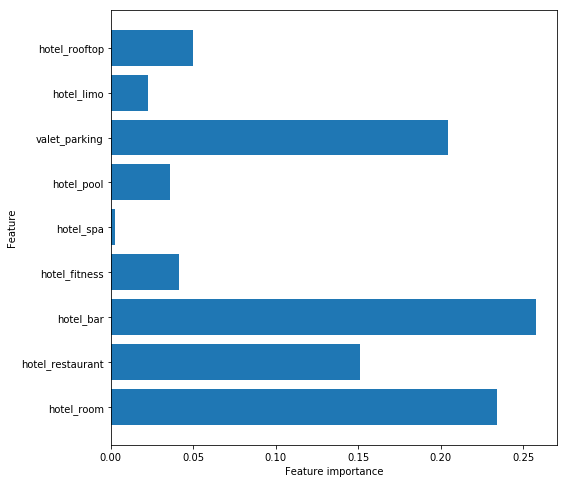

In [400]:
rf_train_pred, rf_test_pred = fit_model_tree(rf,features,X_train_scaled, y_train, X_test_scaled, y_test)

#### With price

In [270]:
rf_p = RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 100)

RandomForestClassifier :
Train: 
 Accuracy: 0.809 
 Recall [0.88151659 0.77725118 0.77470356] 
 Precision [0.84545455 0.85863874 0.74242424] 
 f1 [0.86310905 0.8159204  0.7582205 ]
Test: 
 Accuracy: 0.752 
 Recall [0.94029851 0.71641791 0.64130435] 
 Precision [0.74117647 0.78688525 0.7375    ] 
 f1 [0.82894737 0.75       0.68604651]
 
Features Importance Order
 1) hotel_price                    0.325076
 2) hotel_bar                      0.203393
 3) hotel_restaurant               0.144000
 4) hotel_room                     0.131979
 5) valet_parking                  0.122698
 6) hotel_rooftop                  0.023183
 7) hotel_fitness                  0.017802
 8) hotel_limo                     0.014957
 9) hotel_pool                     0.013514
10) hotel_spa                      0.003397


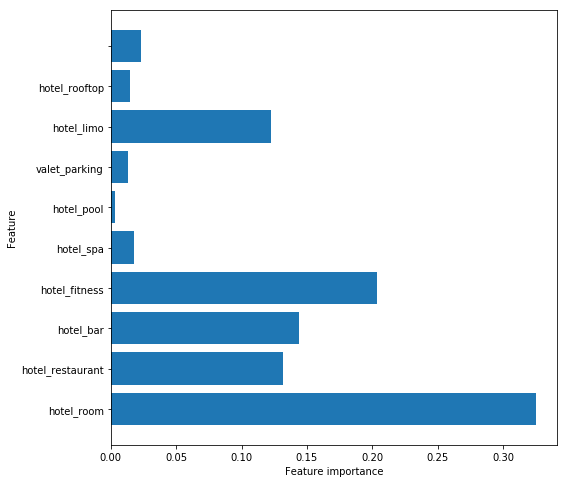

In [450]:
#with price
rf_p_train_pred, rf_p_test_pred = fit_model_tree(rf_p,features_w_price, X_p_train_scaled, y_p_train, X_p_test_scaled, y_p_test)


## AdaBoost

#### Without price

In [234]:
abc = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 100)

AdaBoostClassifier :
Train: 
 Accuracy: 0.704 
 Recall [0.81683168 0.76146789 0.56470588] 
 Precision [0.7300885  0.73127753 0.64864865] 
 f1 [0.77102804 0.74606742 0.60377358]
Test: 
 Accuracy: 0.664 
 Recall [0.85526316 0.65       0.51111111] 
 Precision [0.73863636 0.62903226 0.60526316] 
 f1 [0.79268293 0.63934426 0.55421687]
 
Features Importance Order
 1) hotel_room                     0.600000
 2) hotel_restaurant               0.110000
 3) hotel_rooftop                  0.060000
 4) valet_parking                  0.060000
 5) hotel_fitness                  0.060000
 6) hotel_pool                     0.040000
 7) hotel_bar                      0.040000
 8) hotel_limo                     0.030000
 9) hotel_spa                      0.000000


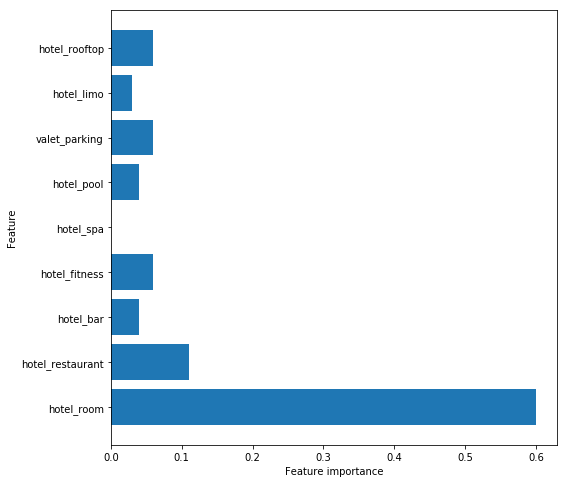

In [333]:
fit_model_tree(abc,features,X_train_scaled, y_train, X_test_scaled, y_test)

#### With price

In [272]:
abc_p = AdaBoostClassifier(learning_rate= 0.3, n_estimators= 50)

AdaBoostClassifier :
Train: 
 Accuracy: 0.76 
 Recall [0.84834123 0.72511848 0.71541502] 
 Precision [0.84433962 0.78461538 0.67537313] 
 f1 [0.8463357  0.75369458 0.69481766]
Test: 
 Accuracy: 0.748 
 Recall [0.91044776 0.74626866 0.63043478] 
 Precision [0.78205128 0.73529412 0.725     ] 
 f1 [0.84137931 0.74074074 0.6744186 ]
 
Features Importance Order
 1) hotel_price                    0.320000
 2) hotel_room                     0.240000
 3) hotel_restaurant               0.120000
 4) hotel_bar                      0.100000
 5) valet_parking                  0.080000
 6) hotel_rooftop                  0.060000
 7) hotel_limo                     0.040000
 8) hotel_fitness                  0.040000
 9) hotel_pool                     0.000000
10) hotel_spa                      0.000000


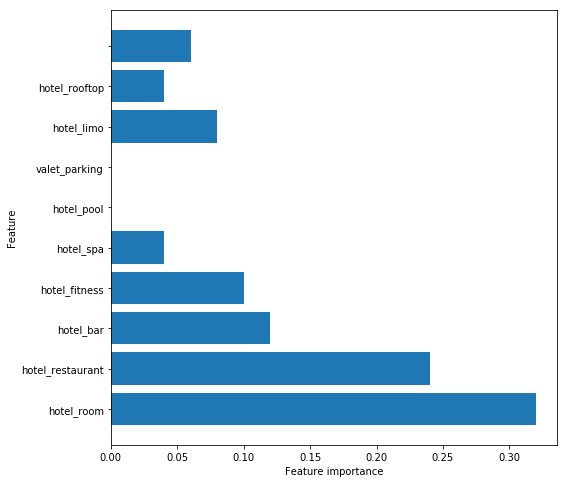

In [335]:
fit_model_tree(abc_p,features_w_price,X_p_train_scaled, y_p_train, X_p_test_scaled, y_p_test)

## Bernoulli Naive Bayes

In [310]:
def fit_model(model, X_train, y_train, X_test, y_test):
    
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    print(str(model).split('(')[0],':')
    print('Train: \n Accuracy:', round(accuracy_score(y_train, train_pred),3),
          '\n Recall',recall_score(y_train, train_pred,average=None),
          '\n Precision',precision_score(y_train, train_pred,average=None),
          '\n f1',f1_score(y_train, train_pred,average=None))
    
    print('Test: \n Accuracy:', round(accuracy_score(y_test, test_pred),3),
          '\n Recall',recall_score(y_test, test_pred,average=None),
          '\n Precision',precision_score(y_test, test_pred,average=None),
          '\n f1',f1_score(y_test, test_pred,average=None))

#### Without price

In [311]:
bnb = BernoulliNB(alpha= 0.1)

In [312]:
fit_model(bnb,X_train_scaled, y_train, X_test_scaled, y_test)

BernoulliNB :
Train: 
 Accuracy: 0.676 
 Recall [0.82673267 0.74770642 0.49411765] 
 Precision [0.71982759 0.70258621 0.5971564 ] 
 f1 [0.76958525 0.72444444 0.54077253]
Test: 
 Accuracy: 0.633 
 Recall [0.85526316 0.61666667 0.45555556] 
 Precision [0.73863636 0.56923077 0.56164384] 
 f1 [0.79268293 0.592      0.50306748]


#### With price

In [276]:
bnb_p = BernoulliNB(alpha= 0.1)

In [313]:
fit_model(bnb_p,X_p_train_scaled, y_p_train, X_p_test_scaled, y_p_test)

BernoulliNB :
Train: 
 Accuracy: 0.707 
 Recall [0.83886256 0.73933649 0.56916996] 
 Precision [0.74369748 0.73933649 0.63716814] 
 f1 [0.78841871 0.73933649 0.60125261]
Test: 
 Accuracy: 0.686 
 Recall [0.94029851 0.65671642 0.52173913] 
 Precision [0.7        0.70967742 0.64864865] 
 f1 [0.80254777 0.68217054 0.57831325]


## SVC


#### Without price

In [301]:
svc = SVC(C= 1, kernel= 'rbf')

In [314]:
fit_model(svc,X_train_scaled, y_train, X_test_scaled, y_test)

SVC :
Train: 
 Accuracy: 0.73 
 Recall [0.86138614 0.7706422  0.59215686] 
 Precision [0.73417722 0.78504673 0.67410714] 
 f1 [0.79271071 0.77777778 0.63048017]
Test: 
 Accuracy: 0.65 
 Recall [0.81578947 0.63333333 0.52222222] 
 Precision [0.72093023 0.62295082 0.59493671] 
 f1 [0.7654321  0.62809917 0.55621302]


#### With price

In [367]:
svc_p = SVC(C= 5, kernel= 'linear')

In [368]:
fit_model(svc_p,X_p_train_scaled, y_p_train, X_p_test_scaled, y_p_test)

SVC :
Train: 
 Accuracy: 0.741 
 Recall [0.86255924 0.72511848 0.65217391] 
 Precision [0.78787879 0.78061224 0.66532258] 
 f1 [0.82352941 0.75184275 0.65868263]
Test: 
 Accuracy: 0.726 
 Recall [0.95522388 0.67164179 0.59782609] 
 Precision [0.73563218 0.73770492 0.70512821] 
 f1 [0.83116883 0.703125   0.64705882]


## OneVsRest Classifier

### Without price

In [377]:
ovr = OneVsRestClassifier(SVC())

In [378]:
fit_model(svc,X_train_scaled, y_train, X_test_scaled, y_test)

SVC :
Train: 
 Accuracy: 0.73 
 Recall [0.86138614 0.7706422  0.59215686] 
 Precision [0.73417722 0.78504673 0.67410714] 
 f1 [0.79271071 0.77777778 0.63048017]
Test: 
 Accuracy: 0.65 
 Recall [0.81578947 0.63333333 0.52222222] 
 Precision [0.72093023 0.62295082 0.59493671] 
 f1 [0.7654321  0.62809917 0.55621302]


### With price

In [380]:
fit_model(svc,X_p_train_scaled, y_p_train, X_p_test_scaled, y_p_test)

SVC :
Train: 
 Accuracy: 0.739 
 Recall [0.86729858 0.74881517 0.62450593] 
 Precision [0.732      0.7979798  0.69603524] 
 f1 [0.79392625 0.77261614 0.65833333]
Test: 
 Accuracy: 0.695 
 Recall [0.95522388 0.73134328 0.47826087] 
 Precision [0.66666667 0.74242424 0.6875    ] 
 f1 [0.78527607 0.73684211 0.56410256]


#### I have better predictive power using the features with price. However, I think it is common sense to see that the more expensive it is, the higher the tier of the hotel. Without the price feature, size of the hotel, aka the number of rooms a hotel has, and whether a hotel has restaurants are important factors in deciding which tier the hotel belongs to.

## Confusion Matrix

#### Random Forest

In [421]:
rf_confustion = confusion_matrix(y_test, rf_test_pred)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a26891d30>)

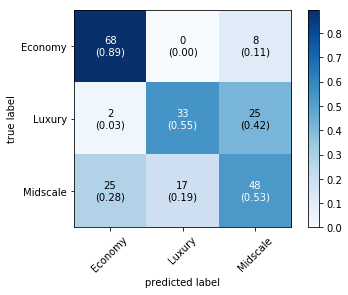

In [437]:

plot_confusion_matrix(rf_confustion,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Economy','Luxury','Midscale'])

In [454]:
rf_p_confusion = confusion_matrix(y_p_test, rf_p_test_pred)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a22bb40b8>)

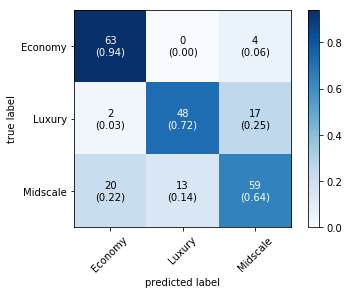

In [455]:
plot_confusion_matrix(rf_p_confusion,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Economy','Luxury','Midscale'])

In [456]:
def plot_roc(y_test, pred_test):
    fpr, tpr, _= roc_curve(y_test, pred_test)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label = 'area %.2f' %roc_auc)
    plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.legend(loc = 'lower right')
    plt.show()